In [872]:
"""
@File    : edu_airdrop_lab.ipynb
@Create  : 2024/09/24
@Modify  : 2024/09/26 18:39:29
@Author  : Flora Sun
@Contact : floras@animocabrands.com
@Desc    : None
"""

'\n@File    : edu_airdrop_lab.ipynb\n@Create  : 2024/09/24\n@Modify  : 2024/09/26 18:39:29\n@Author  : Flora Sun\n@Contact : floras@animocabrands.com\n@Desc    : None\n'

# Import libiaries

In [873]:
import os
import numpy as np
import pandas as pd
import sybil_functions
import importlib
from datetime import datetime
from tqdm import tqdm
import requests
from time import sleep
import matplotlib.pyplot as plt
import random

importlib.reload(sybil_functions)

from sybil_functions import (
    read_from_multiple_csv,
    check_df,
    count_pairs,
    remove_contract_transactions,
    stretched_sigmoid,
    get_weight_df,
    plot_weight_dist,
    plot_weight_cumulative_dist,
    create_community,
    community_visualization,
    file_name_lst,
    random_rate,
    find_main_wallet,
    find_transfer_for_wallet,
    find_commu_for_wallet,
    uncommon_wallets,
)

In [874]:
os.getcwd()

'/Users/floras/Desktop/unique-user'

In [875]:
# set the path to the focal repository
path = '/Users/floras/Desktop/unique-user'
os.chdir(path)

# Import data

## airdrop wallet

In [876]:
edu_airdrop = pd.read_json(
    "edu/data/raw_data/EDU_airdrop.json"
)
edu_airdrop = pd.DataFrame(edu_airdrop)

In [877]:
edu_airdrop_wallet = edu_airdrop["walletAddress"]

In [878]:
# to lower case
edu_airdrop_wallet = edu_airdrop_wallet.str.lower()
edu_airdrop_wallet = edu_airdrop_wallet.tolist()

## token_transfer 2023

In [879]:
token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_token_transfers'
token_transfer_name_lst = file_name_lst(token_transfer_path, startswith="bsc")

In [880]:
token_transfer_df = read_from_multiple_csv(token_transfer_path, token_transfer_name_lst)
token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [881]:
check_df(token_transfer_df)

(829110, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index            int64
block_timestamp     object
block_number         int64
block_hash          object
amount_raw          object
dtype: object

,log_index,block_number
count,829110.000000,8.291100e+05
mean,385.444814,2.415076e+07
std,734.724967,5.840648e+06
min,0.000000,1.396978e+07
25%,141.000000,1.869658e+07
50%,256.000000,2.524435e+07
75%,444.000000,2.875184e+07
max,55709.000000,3.484866e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
74456,0xe9e7cea3dedca5984780bafc599bd69add087d56,0x58f876857a02d6762e0101bb5c46a8c1ed44dc16,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,8616002343588278118,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,484,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,8616002343588278118
97000,0x267022751e06d97b9ee4e5f26cc1023670bdb349,0xd512ffe85be6f9ce44091c4bfb474f0293e818dc,0x1c183b23e8d7a8d287606364f741ddbdafec28de,10615596330275200000,0x156998ee622984a99f9f86c6bc14a4837c91e8bac518...,479,2022-01-01 00:05:52+00:00,13969778,0x6e3d15c5a1aa00d909e259a24cc3a8d181824641093b...,10615596330275200000
97777,0xcb2b25e783a414f0d20a65afa741c51b1ad84c49,0x3fbec4e71bfca562a1631b3870ad8d79623ca2c3,0xea9f1bd192c06f3b594062231721edbb5357806d,2608000000000000000000,0x2ecd2432c32a203aabe02526f7c13062c1eb4cc972e2...,208,2022-01-01 00:06:34+00:00,13969792,0xfa4589d9bc79aee76db839324cd4f9357e5a2815b565...,2608000000000000000000
107244,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,14109370034,0x6830c1b1e77b7a5c99bff8d07c317239284268b3f750...,170,2022-01-01 00:08:22+00:00,13969828,0x046aca96814ecd1c7fa63c61ca360cad265f033abb46...,14109370034
107242,0xaf307c4ea25c8d2a7029dc0322396a6b4b00a0fc,0x056f3336dc183d27fe6785bae037fdb48c77bc71,0x4cd279347bd15cca417439064ee24f5ed3391a8e,500000000000,0x0667e8770dfaa72d783c0f4c6fa6ba145be0f1f04e6d...,378,2022-01-01 00:08:43+00:00,13969835,0xcc9604ce294468e5f95102dcf6c46b19dc0b48dd2f6f...,500000000000


## native token transfer 2023

In [882]:
native_token_transfer_path = r'edu/data/raw_data/edu_airdrop_wallet_native_token_transfers'
native_token_transfer_name_lst = file_name_lst(native_token_transfer_path, startswith="bsc")

In [883]:
native_token_transfer_df = read_from_multiple_csv(native_token_transfer_path, native_token_transfer_name_lst)
native_token_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [884]:
check_df(native_token_transfer_df)

(189105, 10)

token_address        object
transaction_hash     object
transaction_index     int64
block_timestamp      object
trace_id             object
from_address         object
to_address           object
amount_raw           object
call_type            object
block_number          int64
dtype: object

,transaction_index,block_number
count,189105.000000,1.891050e+05
mean,97.476079,2.540913e+07
std,138.107720,6.372803e+06
min,0.000000,1.396987e+07
25%,45.000000,1.995523e+07
50%,79.000000,2.653818e+07
75%,121.000000,3.051036e+07
max,6044.000000,3.484869e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number
27725,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x135f41d360be2a3c5b8a43dc23970a4edb53f1cb75d2...,43,2022-01-01 00:10:25+00:00,call_0x135f41d360be2a3c5b8a43dc23970a4edb53f1c...,0x4cd279347bd15cca417439064ee24f5ed3391a8e,0x10ed43c718714eb63d5aa57b78b54704e256024e,6183914692940477,call,13969869
26910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x7a692e331b6174701fe663b8d39025b0aeb2561e51d5...,9,2022-01-01 00:12:13+00:00,call_0x7a692e331b6174701fe663b8d39025b0aeb2561...,0x0d0707963952f2fba59dd06f2b425ace40b492fe,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,10994100000000000000,call,13969905
24328,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x1fce037731562e0f5e098c46677383f815602c8753c2...,113,2022-01-01 00:13:16+00:00,call_0x1fce037731562e0f5e098c46677383f815602c8...,0x97300791462d8acc2b7882726c2dcafe67a84e2d,0x96f5ac215089e9b9536ba58d5ce7d41ad35a0b75,64588000000000000,call,13969926
26919,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x2b1894a531984d150c873f5825539d51abef73109d70...,25,2022-01-01 00:13:37+00:00,call_0x2b1894a531984d150c873f5825539d51abef731...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969933
25910,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6da9acaffa015ed865c84a2529946ee24b7641cb2857...,18,2022-01-01 00:13:52+00:00,call_0x6da9acaffa015ed865c84a2529946ee24b7641c...,0x60e81aac6ce31d84121732362c9855ae1a9f09f3,0x1111111254fb6c44bac0bed2854e76f90643097d,1000000000000000000,call,13969938


## EDU token transfer 2024 Jan - Sep

In [885]:
edu2024_transfer_path = r'edu/data/raw_data/edu_2024_transfers_JantoSep'
edu2024_transfer_name_lst = file_name_lst(edu2024_transfer_path, endswith="csv")

In [886]:
edu2024_transfer_df = read_from_multiple_csv(edu2024_transfer_path, edu2024_transfer_name_lst)
edu2024_transfer_df.sort_values(by="block_timestamp", inplace=True)

In [887]:
check_df(edu2024_transfer_df)

(386911, 10)

token_address       object
from_address        object
to_address          object
value               object
transaction_hash    object
log_index           object
block_timestamp     object
block_number        object
block_hash          object
amount_raw          object
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
count,386911,386911,386911,386911,386911,386911,386911,386911,386911,386911
unique,1,10600,13620,300125,325600,3362,121248,241596,241596,298258
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x6425bc30d0751af5181fc74a50e760b0e4a19811,0x6425bc30d0751af5181fc74a50e760b0e4a19811,54370000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,0,"March 18, 2024, 5:44 PM","35,917,682",0xfc6ea849e769c02dddd3f5f58c406c443fde47c30879...,"54,370,000,000,000,000,000"
freq,386911,83485,89590,553,100,5139,253,100,100,553


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw
122133,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x989a69a3e608483ae3f6fb21e2874f5c8fb98697,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,1222000000000000000000,0x529a6391b441a43147b6cc3d57c4308907e8c2bbad2c...,52,"April 1, 2024, 10:00 AM","37,475,937",0x891e0914c2c45a1979b10c7925bc1ca79797681afbf4...,"1,222,000,000,000,000,000,000"
152709,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x831310496dd05ecac3a99472151bbc2d2c2aab90,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,473000000000000000000,0x7987d18541eefeab90b26bf22664f9c9022db8db32a8...,133,"April 1, 2024, 10:00 AM","37,475,938",0x71db12ed3a480b59252b30a02c4d5037854abcbf78cd...,"473,000,000,000,000,000,000"
149118,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x0639556f03714a74a5feeaf5736a4a64ff70d206,0x4e387da922077e9106c0d963b2c0fecad9b550c1,20126800000000000000,0xe3359e578f880bf6fe35ac4b5ef8bd6bdca8f7f51b6d...,18,"April 1, 2024, 10:04 AM","37,476,027",0xf741b93574958f6a4dc39d128f146c2f8267a5a3e74e...,"20,126,800,000,000,000,000"
149283,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,0x67b11fed879c37c35c4fde0be843491ddcb8d054,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,447,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"
122131,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1a074554b79cc84076317941cb30c2abd0fe7993,0x9c2964cfe5b6bd093b6ca260b12924a301288cca,68593687373542923398,0x6d105a471494b73d10b5d34f982a4e54e4c8e54e599d...,443,"April 1, 2024, 10:04 AM","37,476,020",0x7b166c49785b8c3ab6630171b36265024b34b80ffffa...,"68,593,687,373,542,900,000"


## Contract list

In [888]:
## Contract list
full_contract_path = r"edu/data/processed_data"
full_contract_file = file_name_lst(full_contract_path, startswith="contract", endswith=".csv")
full_contract_df = read_from_multiple_csv(full_contract_path, full_contract_file)
full_contract_lst = full_contract_df["address"].tolist() 

# After Airdrop

## Edu 2023 Jun22 onwards data

In [889]:
edu_airdrop_2023_transfer = token_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2023_transfer["to_address"].isin(edu_airdrop_wallet)
]

# only EDU token address
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["token_address"]
    == "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
edu_airdrop_2023_transfer["date"] = pd.to_datetime(
    edu_airdrop_2023_transfer["block_timestamp"]
).dt.date
edu_airdrop_2023_transfer["date"] = pd.to_datetime(edu_airdrop_2023_transfer["date"])

In [890]:
edu_airdrop_2023_transfer = edu_airdrop_2023_transfer[
    edu_airdrop_2023_transfer["date"] >= "2023-06-22"
]

In [891]:
print(min(edu_airdrop_2023_transfer["date"]))
print(max(edu_airdrop_2023_transfer["date"]))

2023-06-22 00:00:00
2023-12-31 00:00:00


In [892]:
# check_df(edu_airdrop_2023_transfer)

## Supliment 2024 EDU data

In [893]:
edu_airdrop_2024_transfer = edu2024_transfer_df.copy()

# select only the transactions between the airdrop wallets
edu_airdrop_2024_transfer = edu_airdrop_2024_transfer[
    edu_airdrop_2024_transfer["from_address"].isin(edu_airdrop_wallet)
    | edu_airdrop_2024_transfer["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
edu_airdrop_2024_transfer["date"] = pd.to_datetime(
    edu_airdrop_2024_transfer["block_timestamp"]
).dt.date
edu_airdrop_2024_transfer["date"] = pd.to_datetime(edu_airdrop_2024_transfer["date"])

In [894]:
# check_df(edu_airdrop_2024_transfer)

## Concatenate the two dataframes

In [895]:
edu_airdrop_transfer = pd.concat(
    [edu_airdrop_2023_transfer, edu_airdrop_2024_transfer], ignore_index=True
)

In [896]:
# remove those with same from and to address
edu_airdrop_transfer = edu_airdrop_transfer[
    edu_airdrop_transfer["from_address"] != edu_airdrop_transfer["to_address"]
]

In [897]:
# check_df(edu_airdrop_transfer)

## Remove contract addresses

### Based on API

In [898]:
# all_edu_airdrop_transfer_addresses_test = list(
#     set(edu_airdrop_transfer["from_address"].unique())
#     .union(set(edu_airdrop_transfer["to_address"].unique()))
# )
# all_edu_airdrop_transfer_addresses_test = [i.lower() for i in all_edu_airdrop_transfer_addresses_test]
# all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in edu_airdrop_wallet]
# all_edu_airdrop_transfer_addresses_test = [address for address in all_edu_airdrop_transfer_addresses_test if address not in full_contract_lst]

# print(len(all_edu_airdrop_transfer_addresses_test))

In [899]:
# # loop through all addresses
# test_contract_lst = []

# for i in tqdm(range(len(all_edu_airdrop_transfer_addresses_test))):
#     sleep(0.15)
#     address = list(all_edu_airdrop_transfer_addresses_test)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             test_contract_lst.append(address)
#             print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [900]:
# # save the file
# after_edu_contract_df = pd.DataFrame(test_contract_lst, columns=["address"])

In [901]:
edu_airdrop_transfer = remove_contract_transactions(
    edu_airdrop_transfer,
    ["from_address", "to_address"],
    full_contract_df["address"],
)

In [902]:
print(min(edu_airdrop_transfer['block_timestamp']))
print(max(edu_airdrop_transfer['block_timestamp']))

2023-06-22 01:41:21+00:00
September 9, 2024, 2:25 PM


In [903]:
check_df(edu_airdrop_transfer)

(2635, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                   object
block_timestamp             object
block_number                object
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
count,2635,2635,2635,2635,2635,2635.0,2635,2635.0,2635,2635,2635
unique,1,1723,1335,731,2613,883.0,2395,2443.0,2443,763,320
top,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,125000000000000000000,0x3061c01766ab755572a6c5b29d64803eb1a1cccb6ade...,5.0,2023-06-22 11:46:48+00:00,29322976.0,0xa2dd14099f19f1278d63753383a1e44b519407d4752b...,125000000000000000000,2023-06-22 00:00:00
freq,2635,281,51,998,7,13.0,13,13.0,13,884,934
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-06-22 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-10-01 00:00:00


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
0,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x5c693fd2d00e0729f59924d979eac65c7576a84e,22937000000000000000,0xb71bbf689e3383b1002ae6803bfd37ee5dd97b1b0629...,3,2023-06-22 01:41:21+00:00,29310908,0xb6138487681a832a958f872e1407eae62a93635ba3ff...,22937000000000000000,2023-06-22
1,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x8894e0a0c962cb723c1976a4421c95949be2d4e3,0x74e121599db43f2b11b75179aaf06f5ed6187977,2900960000000000000000,0x20b67187ba37505dde630cd5f53075fa3807f8b60c3e...,76,2023-06-22 03:36:11+00:00,29313190,0x5722d64cf65b6029b5b3cb411bdd2c32e10159f9269c...,2900960000000000000000,2023-06-22
3,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,0x13f4066005fa05dbff257af49034f0afb827aae5,215650263460000000000,0x4dbe345a73518bc52d7fd4451e9654f891f179e4e8dc...,5,2023-06-22 06:17:58+00:00,29316416,0xf78bcdef2fbcf2039340c7c1fe06f14f9d45ce96a932...,215650263460000000000,2023-06-22
5,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x1bd5371940f7d032381a2da7f7e651f4e398fdb2,0xd953bd2e2c4167417f0c14c13764c91c2d7aa5d4,505960000000000000000,0x19be2714d33d3752a614a2374c011623680375cb7346...,190,2023-06-22 08:35:00+00:00,29319154,0xb1b41a07f8897be7ce82dbba08010757995b99a0d8bd...,505960000000000000000,2023-06-22
24,0xbdeae1ca48894a1759a8374d63925f21f2ee2639,0x411d41fa6be15967020a016876891b254d7f8769,0x2b5f4808a1f5444834f9da1feb914a4ecbfac49f,500000000000000000000,0x0baac8ad98b3b3e1fd6ca85bc09f41b9c05a706b5f95...,174,2023-06-22 11:01:23+00:00,29322072,0xc831f28e524c25ff20daa2074bd6e291d4329078d5a4...,500000000000000000000,2023-06-22


## Get token transaction counts

In [904]:
edu_airdrop_pair_count = pd.DataFrame(
    count_pairs(edu_airdrop_transfer, "from_address", "to_address")
)
edu_airdrop_pair_count.columns = ["edu_transfer_count"]
edu_airdrop_pair_count = get_weight_df(edu_airdrop_pair_count)
print(len(edu_airdrop_pair_count))
display(edu_airdrop_pair_count.head(10))

2071


,pair,edu_transfer_count,wallet_a,wallet_b
0,"(0x0a9fd20fc663cc9afa28699959965a2a2dc5aae3, 0...",16,0x0a9fd20fc663cc9afa28699959965a2a2dc5aae3,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
1,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",15,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xf024ca2826e9aa8a5e79b283ed7aac4802d62675
2,"(0x7646c2e54f972ea0def55b66b4f05416acd49db0, 0...",15,0x7646c2e54f972ea0def55b66b4f05416acd49db0,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
3,"(0x098d3b9d61de50bd85059969d1b302047d0ac73a, 0...",13,0x098d3b9d61de50bd85059969d1b302047d0ac73a,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
4,"(0x8942ebf98d7e0f874e61c9f8837f795625420fa8, 0...",13,0x8942ebf98d7e0f874e61c9f8837f795625420fa8,0xec9076b1ae2fde2a34f7db58ceec40d251a01f1b
5,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",13,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xe53ee538b6ad601fa384c00deac8d07fa6eef3ce
6,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",12,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xfda14453494e93ce4e69f9152490d7a1e5d18abb
7,"(0xa2ee35932171ce426351d7a3e31ee81236f23dd2, 0...",12,0xa2ee35932171ce426351d7a3e31ee81236f23dd2,0xdbb9d557191501fd2cadf5a9fd80845f162d20dd
8,"(0x3621f96aea9904da476727550ee205ca4c2f779c, 0...",11,0x3621f96aea9904da476727550ee205ca4c2f779c,0xa2ee35932171ce426351d7a3e31ee81236f23dd2
9,"(0x539d9a0783e563775430988e79f71d0b5dcba5bb, 0...",11,0x539d9a0783e563775430988e79f71d0b5dcba5bb,0xa2ee35932171ce426351d7a3e31ee81236f23dd2


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [905]:
# Define parameters
stretch = 1
axis_end = 6

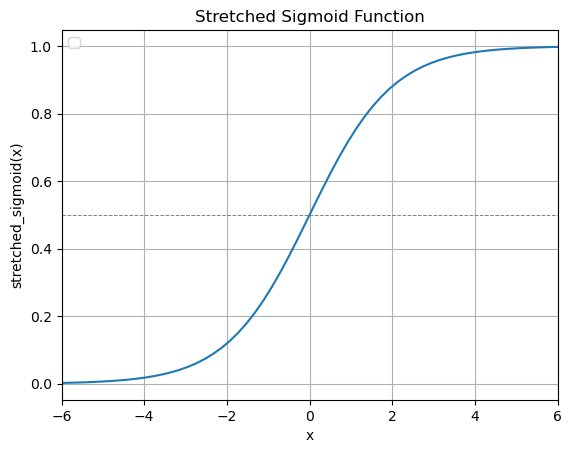

In [906]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - weight_df

In [907]:
# Copy the merged pair dataframe
weight_df = edu_airdrop_pair_count.copy()

# Check if wallets are in edu_airdrop_wallet
weight_df["if_wallet_a_in_edu"] = weight_df["wallet_a"].isin(edu_airdrop_wallet)
weight_df["if_wallet_b_in_edu"] = weight_df["wallet_b"].isin(edu_airdrop_wallet)

# Calculate the internal weight
weight_df["internal_weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the total weight
weight_df["weight"] = weight_df.apply(
    lambda x: stretched_sigmoid(x["edu_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)

# Sort based on weight
weight_df = weight_df.sort_values(by="weight", ascending=False)

In [908]:
check_df(weight_df)

(2071, 8)

pair                   object
edu_transfer_count      int64
wallet_a               object
wallet_b               object
if_wallet_a_in_edu       bool
if_wallet_b_in_edu       bool
internal_weight       float64
weight                float64
dtype: object

,edu_transfer_count,internal_weight,weight
count,2071.000000,2071.000000,2071.000000
mean,1.272332,0.041960,0.794426
std,1.204742,0.172686,0.183143
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,1.000000,0.000000,0.731059
max,16.000000,0.880797,1.761594


,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
127,"(0x0a678ebe4a2a0aba1f80f72618413b24f480b946, 0...",2,0x0a678ebe4a2a0aba1f80f72618413b24f480b946,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
133,"(0x85689350ab615c8d8ab61113f74ae596875ca773, 0...",2,0x85689350ab615c8d8ab61113f74ae596875ca773,0x9e7ba9e5fd84805122788fdaa99b7fed8a9c2acb,True,True,0.880797,1.761594
125,"(0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3, 0...",2,0x6a73f55bdf562ced0d3c4b0036657e1dba263bd3,0x85689350ab615c8d8ab61113f74ae596875ca773,True,True,0.880797,1.761594
83,"(0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5, 0...",2,0x5e7fba8becafabbcbbad02674d41f9cd6a0d01d5,0xca71e829398cec2de2440606420ab9157badb80b,True,True,0.880797,1.761594
193,"(0x7dab7f1f45aaf5d6d6fed278981b540ab1923c13, 0...",2,0x7dab7f1f45aaf5d6d6fed278981b540ab1923c13,0xe517f5274a21c74ae230d99010ad11992d0e836b,True,True,0.880797,1.761594


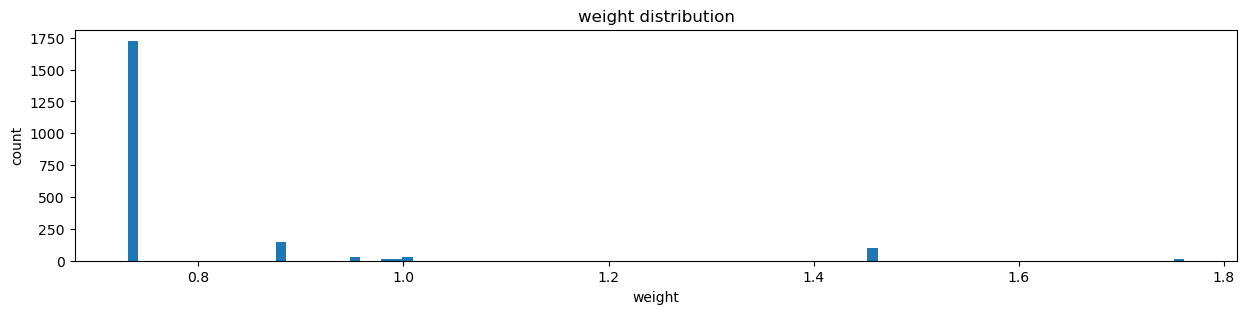

In [909]:
plot_weight_dist(weight_df)

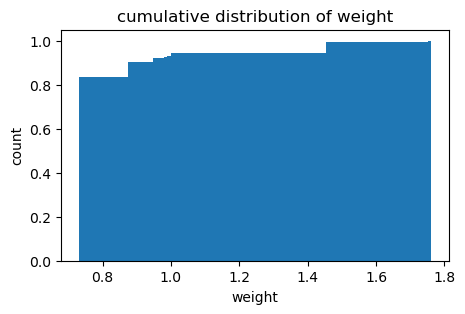

In [910]:
plot_weight_cumulative_dist(weight_df)

## weight -> community

#### build community

In [911]:
# community_lst_lou_1 = create_community(weight_df, "louvain", resolution=1)
community_lst_s_1 = create_community(weight_df, 'surprise')
# community_lst_lei_1 = create_community(weight_df, 'leiden')

Method: surprise
Number of unique wallets: 2855
Number of edges: 2071
Number of communities detected: 1032
-
Average community size: 2.766472868217054
Max community size: 29
Min community size: 1



In [912]:
# row_lst = range(10)
row_lst = [1]
community_lst_visualization_1 = community_lst_s_1

for row in row_lst:
    print("size of community:", len(community_lst_visualization_1[row]))
    print(find_main_wallet(community_lst_visualization_1[row], weight_df))
    commu_visual_df_1 = weight_df.loc[
        weight_df["wallet_a"].isin(community_lst_visualization_1[row])
        & weight_df["wallet_b"].isin(community_lst_visualization_1[row])
    ]
    # commu_visual_df_1['if_wallet_a_in_edu'] = commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # commu_visual_df_1['if_wallet_b_in_edu'] = commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", commu_visual_df_1["weight"].mean())

size of community: 29
{'0x518176cf1594b388ecca1ac9b6a7c3fe6482f387': 37.28398751013025, '0xbae4da7e39748b18f2cd2fa91d64c31a4bd20973': 0.7310585786300049, '0xfb0fe9979b01c7359e22f01b4e31891a22188747': 0.7310585786300049, '0xc457c90ca075c0162fd3e5b74c68ed443fb9690a': 0.7310585786300049, '0x9374bb441b2c748c402a36fa200dd09af072b63e': 0.7310585786300049, '0xee9559301065224cbe9ee2ca2f76dc47761b282a': 0.7310585786300049, '0xa79f41684d2d3c306c679a3061301ebe844c5b3c': 0.7310585786300049, '0x055bbcccd843fc9a6a9514b5b0d742c0704186e5': 0.7310585786300049, '0xfeac73820924814e2d576ef799fc0fdd194be45c': 0.7310585786300049, '0x6bbe73d9f38fd5ef1a0a0d44e3e1b5d9cba2aae4': 0.7310585786300049, '0x20e439f6e9410df01bc5aa6da39ad4b5cc8471e3': 0.7310585786300049, '0x9b4255a2a803d2cccdcc97d50369d53e223ac4b2': 0.7310585786300049, '0xf6fe2c4e2c1ed13a57827fea19edebbb91863029': 0.7310585786300049, '0xa0450dd9717091dba11756e00d648152302e0ad4': 0.7310585786300049, '0xfb9e2aef73cdf919e4425aa97ae8aae876610cc7': 0.731058

In [913]:
community_visualization(commu_visual_df_1)

In [914]:
commu_visual_df_1

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
2042,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xbae4da7e39748b18f2cd2fa91d64c31a4bd20973,False,True,0.0,0.731059
2041,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xfb0fe9979b01c7359e22f01b4e31891a22188747,False,True,0.0,0.731059
2019,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xc457c90ca075c0162fd3e5b74c68ed443fb9690a,False,True,0.0,0.731059
2015,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0x9374bb441b2c748c402a36fa200dd09af072b63e,False,True,0.0,0.731059
2043,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xee9559301065224cbe9ee2ca2f76dc47761b282a,False,True,0.0,0.731059
2044,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xa79f41684d2d3c306c679a3061301ebe844c5b3c,False,True,0.0,0.731059
2069,"(0x055bbcccd843fc9a6a9514b5b0d742c0704186e5, 0...",1,0x055bbcccd843fc9a6a9514b5b0d742c0704186e5,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,True,False,0.0,0.731059
2068,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xfeac73820924814e2d576ef799fc0fdd194be45c,False,True,0.0,0.731059
2067,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0x6bbe73d9f38fd5ef1a0a0d44e3e1b5d9cba2aae4,False,True,0.0,0.731059
2061,"(0x20e439f6e9410df01bc5aa6da39ad4b5cc8471e3, 0...",1,0x20e439f6e9410df01bc5aa6da39ad4b5cc8471e3,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,True,False,0.0,0.731059


In [915]:
test_main_wallet = '0x8894e0a0c962cb723c1976a4421c95949be2d4e3'
commu_visual_df_1[
    (commu_visual_df_1["wallet_a"] != test_main_wallet)
    & (commu_visual_df_1["wallet_b"] != test_main_wallet)
]

,pair,edu_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
2042,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xbae4da7e39748b18f2cd2fa91d64c31a4bd20973,False,True,0.0,0.731059
2041,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xfb0fe9979b01c7359e22f01b4e31891a22188747,False,True,0.0,0.731059
2019,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xc457c90ca075c0162fd3e5b74c68ed443fb9690a,False,True,0.0,0.731059
2015,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0x9374bb441b2c748c402a36fa200dd09af072b63e,False,True,0.0,0.731059
2043,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xee9559301065224cbe9ee2ca2f76dc47761b282a,False,True,0.0,0.731059
2044,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xa79f41684d2d3c306c679a3061301ebe844c5b3c,False,True,0.0,0.731059
2069,"(0x055bbcccd843fc9a6a9514b5b0d742c0704186e5, 0...",1,0x055bbcccd843fc9a6a9514b5b0d742c0704186e5,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,True,False,0.0,0.731059
2068,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0xfeac73820924814e2d576ef799fc0fdd194be45c,False,True,0.0,0.731059
2067,"(0x518176cf1594b388ecca1ac9b6a7c3fe6482f387, 0...",1,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,0x6bbe73d9f38fd5ef1a0a0d44e3e1b5d9cba2aae4,False,True,0.0,0.731059
2061,"(0x20e439f6e9410df01bc5aa6da39ad4b5cc8471e3, 0...",1,0x20e439f6e9410df01bc5aa6da39ad4b5cc8471e3,0x518176cf1594b388ecca1ac9b6a7c3fe6482f387,True,False,0.0,0.731059


# Before Airdrop

## Before Airdrop - native token

In [916]:
before_bsc_native_transfers = native_token_transfer_df.copy()

# select only the transactions between the airdrop wallets
before_bsc_native_transfers = before_bsc_native_transfers[
    before_bsc_native_transfers["from_address"].isin(edu_airdrop_wallet)
    | before_bsc_native_transfers["to_address"].isin(edu_airdrop_wallet)
]

# Generate the date column
before_bsc_native_transfers["date"] = pd.to_datetime(
    before_bsc_native_transfers["block_timestamp"]
).dt.date
before_bsc_native_transfers["date"] = pd.to_datetime(before_bsc_native_transfers["date"])

# Filter the transactions based on date
before_bsc_native_transfers = before_bsc_native_transfers[
    (before_bsc_native_transfers["date"] <= "2023-06-21")
    & (before_bsc_native_transfers["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_bsc_native_transfers.sort_values(by="block_timestamp", inplace=True)

In [917]:
check_df(before_bsc_native_transfers)

(48012, 11)

token_address                object
transaction_hash             object
transaction_index             int64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
dtype: object

,transaction_index,block_number
count,48012.000000,4.801200e+04
mean,81.317254,2.710431e+07
std,66.500250,1.268488e+06
min,0.000000,2.439411e+07
25%,39.000000,2.618365e+07
50%,71.000000,2.710271e+07
75%,107.000000,2.816683e+07
max,2606.000000,2.930868e+07


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date
9747,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01
9708,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01
9753,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01
9740,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01
9755,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01


## Before Airdrop - other token

In [918]:
before_token_transfer = token_transfer_df.copy()

# select only the transactions between the airdrop wallets
before_token_transfer = before_token_transfer[
    before_token_transfer["from_address"].isin(edu_airdrop_wallet)
    | before_token_transfer["to_address"].isin(edu_airdrop_wallet)
]

# exclude EDU token address
before_token_transfer = before_token_transfer[
    before_token_transfer["token_address"]
    != "0xbdeae1ca48894a1759a8374d63925f21f2ee2639"
]

# Generate the date column
before_token_transfer["date"] = pd.to_datetime(
    before_token_transfer["block_timestamp"]
).dt.date
before_token_transfer["date"] = pd.to_datetime(before_token_transfer["date"])

# Filter the transactions based on date
before_token_transfer = before_token_transfer[
    (before_token_transfer["date"] <= "2023-06-21")
    & (before_token_transfer["date"] >= "2023-01-01")
]

# Sort the transactions by date
before_token_transfer.sort_values(by="block_timestamp", inplace=True)

In [919]:
check_df(before_token_transfer)

(258097, 11)

token_address               object
from_address                object
to_address                  object
value                       object
transaction_hash            object
log_index                    int64
block_timestamp             object
block_number                 int64
block_hash                  object
amount_raw                  object
date                datetime64[ns]
dtype: object

,log_index,block_number
count,258097.000000,2.580970e+05
mean,396.673731,2.704285e+07
std,781.220551,1.282512e+06
min,0.000000,2.439427e+07
25%,135.000000,2.613268e+07
50%,241.000000,2.698742e+07
75%,436.000000,2.816885e+07
max,55709.000000,2.930888e+07


,token_address,from_address,to_address,value,transaction_hash,log_index,block_timestamp,block_number,block_hash,amount_raw,date
3396,0x55d398326f99059ff775485246999027b3197955,0x5665785813011a5c37c10972f8d3d463441637c3,0x2e750b5d03ff1b1c926225982fac3f5cb761fe18,0,0x557713b0f7ef5ba7c01f3811bebdae53b5383137e5a9...,93,2023-01-01 00:30:59+00:00,24394271,0xc774fde8c832cd710fda9f83d1024350b583c86c02e5...,0,2023-01-01
1421,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xc590175e458b83680867afd273527ff58f74c02b,0xe1051fdb83569bea32658ff95e6b08afef372d70,24349528786727813119,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,162,2023-01-01 00:44:41+00:00,24394545,0xd5024c88189ec715311cf5f40ee69b6b38e9fb8500ca...,24349528786727813119,2023-01-01
1416,0xe9e7cea3dedca5984780bafc599bd69add087d56,0xe1051fdb83569bea32658ff95e6b08afef372d70,0xac771ec0d1dda2cabffc1e32e103394707e50c9c,70000000000000000000,0xfa1206127ed454e160c68b466de288a19fd32843ae82...,150,2023-01-01 00:46:23+00:00,24394579,0x3f96a8ecae11ae120013e4eefaa159470400e245a7ad...,70000000000000000000,2023-01-01
3288,0x4a8e348b29df68fa4d874b043f920150d750604e,0x0000000000000000000000000000000000000000,0xfbd08fd2b2c7148b4e38624158c3155b5b49f886,518928,0x572b77322f02b0e0f2ad317bc9f0170bf0db55091fff...,187,2023-01-01 00:52:29+00:00,24394701,0xf8ae4b7bd004d004e5d2a5c4a1598719ec5ec87c0768...,518928,2023-01-01
3197,0x4a8e348b29df68fa4d874b043f920150d750604e,0x0000000000000000000000000000000000000000,0x6cb60ea44123b24daf738bb74990e7a615d49559,518936,0x7f213b5fe49999ddedf632414a484ea64a3589effba3...,93,2023-01-01 01:03:29+00:00,24394921,0xc42fae29345c280e3b414067de2e2a6ac497f7bedf80...,518936,2023-01-01


## Concate before_bsc_native_transfers and before_token_transfer

In [920]:
before_bsc_transfers = pd.concat(
    [before_bsc_native_transfers, before_token_transfer], ignore_index=True
)

In [921]:
# remove transactions with same from and to address
before_bsc_transfers = before_bsc_transfers[
    before_bsc_transfers["from_address"] != before_bsc_transfers["to_address"]
]

In [922]:
check_df(before_bsc_transfers)

(305982, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,47989.000000,3.059820e+05,257993.000000
mean,81.323720,2.705298e+07,396.751590
std,66.507969,1.280411e+06,781.364077
min,0.000000,2.439411e+07,0.000000
25%,39.000000,2.614135e+07,135.000000
50%,71.000000,2.701987e+07,241.000000
75%,107.000000,2.816881e+07,436.000000
max,2606.000000,2.930888e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
0,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31.0,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01,NaN,NaN,NaN
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7.0,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25.0,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01,NaN,NaN,NaN
3,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48.0,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01,NaN,NaN,NaN
4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29.0,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01,NaN,NaN,NaN


## Remove contract transactions

In [923]:
all_before_bsc_transfer_addresses = list(
    set(before_bsc_transfers["from_address"].unique()).union(
        set(before_bsc_transfers["to_address"].unique())
    )
)
all_before_bsc_transfer_addresses = [x for x in all_before_bsc_transfer_addresses if x not in edu_airdrop_wallet]
print(len(all_before_bsc_transfer_addresses))

36912


In [924]:
# # loop through all addresses
# contract_lst = []

# for i in tqdm(range(62067, len(all_before_bsc_transfer_addresses))):
#     sleep(0.15)
#     address = list(all_before_bsc_transfer_addresses)[i]
#     # oklink api
#     url = f"https://www.oklink.com/api/v5/explorer/eth/api?module=contract&action=getabi&address={address}"
#     headers = {"Ok-Access-Key": "f0f1e2ec-7e9a-470d-aa0f-a436cc55c2e6"}
#     response = requests.request(method="GET", url=url, headers=headers)
#     response_json = response.json()

#     try:
#         if response_json["status"] == "1":
#             contract_lst.append(address)
#             # print(f"Address: {address}")
#     except:
#         print(f"Error in getting info for: {address}")
#         print(response_json)
#         pass

In [925]:
# # save the file
# before_bnb_contract_df = pd.DataFrame(contract_lst, columns=["address"])
# before_bnb_contract_df.to_csv(
#     r"/Users/floras/Desktop/flora/personal/unique-user-identification/data/before_bnb_contract.csv",
#     index=False,
# )·

In [926]:
before_bsc_transfers = remove_contract_transactions(
    before_bsc_transfers,
    ["from_address", "to_address"],
    full_contract_lst,
)

In [927]:
print(min(before_bsc_transfers['block_timestamp']))
print(max(before_bsc_transfers['block_timestamp']))

2023-01-01 00:23:08+00:00
2023-06-21 23:49:54+00:00


In [928]:
check_df(before_bsc_transfers)

(152826, 14)

token_address                object
transaction_hash             object
transaction_index           float64
block_timestamp              object
trace_id                     object
from_address                 object
to_address                   object
amount_raw                   object
call_type                    object
block_number                  int64
date                 datetime64[ns]
value                        object
log_index                   float64
block_hash                   object
dtype: object

,transaction_index,block_number,log_index
count,31661.000000,1.528260e+05,121165.000000
mean,78.161618,2.701358e+07,494.907135
std,66.795261,1.274050e+06,1060.280697
min,0.000000,2.439411e+07,0.000000
25%,34.000000,2.603439e+07,141.000000
50%,68.000000,2.702244e+07,282.000000
75%,105.000000,2.808464e+07,562.000000
max,2606.000000,2.930868e+07,55709.000000


,token_address,transaction_hash,transaction_index,block_timestamp,trace_id,from_address,to_address,amount_raw,call_type,block_number,date,value,log_index,block_hash
0,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x6412b8de9ce48bb247bf0634efd6253bc8f877b4d7b9...,31.0,2023-01-01 00:23:08+00:00,call_0x6412b8de9ce48bb247bf0634efd6253bc8f877b...,0x942a099a6791359370751904a70c4e3fb0562bdd,0x88a70fb1838ee92401298f781866dc337e5ec91d,1000000000000000,call,24394114,2023-01-01,NaN,NaN,NaN
1,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1edf87...,7.0,2023-01-01 00:32:35+00:00,call_0x48d0ebabef0f526cd9afbb4eed6c9d961d7a9f1...,0x1fbe2acee135d991592f167ac371f3dd893a508b,0xe2c2bbac29a8991c21d50cfb76d56ef455d85157,977030290000000000,call,24394303,2023-01-01,NaN,NaN,NaN
2,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0xebe638c55d9d0884e6fc320d08df545b72ef7c064798...,25.0,2023-01-01 00:44:41+00:00,call_0xebe638c55d9d0884e6fc320d08df545b72ef7c0...,0xe1051fdb83569bea32658ff95e6b08afef372d70,0x1a1ec25dc08e98e5e93f1104b5e5cdd298707d31,100000000000000000,call,24394545,2023-01-01,NaN,NaN,NaN
3,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x991df9612b69c70fc57449d2d7155b9b249995213908...,48.0,2023-01-01 02:12:53+00:00,call_0x991df9612b69c70fc57449d2d7155b9b2499952...,0xf289bba24301e0f6280a4280834b929663e1eb62,0x0a9b43b6d9119bc4f8d480839f6652630b0dd669,1000000000000000000,call,24396300,2023-01-01,NaN,NaN,NaN
4,0xeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee,0x18cb09fbbaa658867e77c0af296335c2890c671859d7...,29.0,2023-01-01 02:23:31+00:00,call_0x18cb09fbbaa658867e77c0af296335c2890c671...,0x14a552135fac9587635ecd15bc65cdb9ca3d459a,0xcf4af851fe9892669df98b4c74bed68361ec5639,6000000000000000,call,24396500,2023-01-01,NaN,NaN,NaN


## Get before transaction counts

In [929]:
before_bsc_pair_count = pd.DataFrame(
    count_pairs(before_bsc_transfers, "from_address", "to_address")
)
before_bsc_pair_count.columns = ["before_bsc_transfer_count"]
before_bsc_pair_count = get_weight_df(before_bsc_pair_count)

before_bsc_pair_count["if_wallet_a_in_edu"] = before_bsc_pair_count["wallet_a"].isin(
    edu_airdrop_wallet
)
before_bsc_pair_count["if_wallet_b_in_edu"] = before_bsc_pair_count["wallet_b"].isin(
    edu_airdrop_wallet
)


print(len(before_bsc_pair_count))
display(before_bsc_pair_count[before_bsc_pair_count["before_bsc_transfer_count"] == 40])

66588


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu
157,"(0x922779aae2cc05773b4810fe6ba70e4769d7f51b, 0...",40,0x922779aae2cc05773b4810fe6ba70e4769d7f51b,0xf03186a1fd2b42046768dcdb5aa30604a97747d5,False,True
158,"(0x674092069ac4f1e6ec911af630eb3ca05dfd08f9, 0...",40,0x674092069ac4f1e6ec911af630eb3ca05dfd08f9,0xac0e13391c9cacd25d523b2b98ddab418578b0bc,True,False
159,"(0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558, 0...",40,0x8bfbaa24c27c6309a95e0aa22801bc1d61a52558,0xe4edb277e41dc89ab076a1f049f4a3efa700bce8,True,False
160,"(0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce, 0...",40,0x9f9ebce72c0715cdbad4d589986eb22f6782a1ce,0xa7b8149bbf761ebcfa5f7b7431c6d72dfcd49965,True,False


## Token transaction counts -> weight

### 1. Stretched_sigmoid

In [930]:
# Define parameters
stretch = 1
axis_end = 15

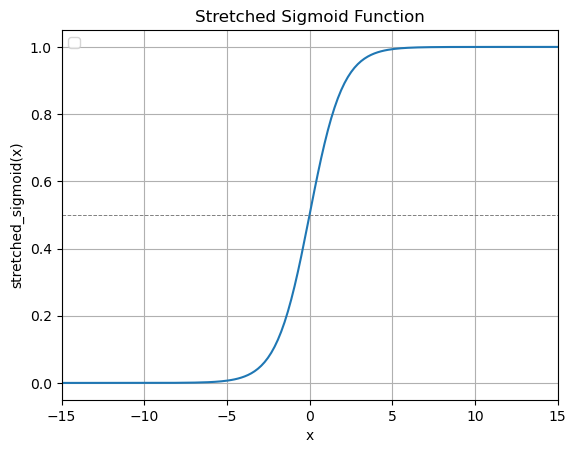

In [931]:
# Generate x values
x = np.linspace(-axis_end, axis_end, 10 * axis_end)
# Calculate y values using the sigmoid function
y = stretched_sigmoid(x, stretch)

# Plot the sigmoid function
plt.plot(x, y, label="Stretched Sigmoid Function")
plt.title("Stretched Sigmoid Function")
plt.xlabel("x")
plt.ylabel("stretched_sigmoid(x)")
plt.grid(True)
plt.axhline(0.5, color="gray", linestyle="--", linewidth=0.7)
plt.legend("")
plt.xlim(-axis_end, axis_end)
plt.show()

#### 1.1 - before_weight_df

In [932]:
# Copy the merged pair dataframe
before_weight_df = before_bsc_pair_count.copy()

# Calculate the internal weight
before_weight_df["internal_weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) 
    if x["if_wallet_a_in_edu"] and x["if_wallet_b_in_edu"] else 0, axis=1
)

# Calculate the weight between the two wallets
before_weight_df["weight"] = before_weight_df.apply(
    lambda x: stretched_sigmoid(x["before_bsc_transfer_count"], stretch) + x["internal_weight"],
    axis=1
)

# sort based on weight
before_weight_df = before_weight_df.sort_values(by="weight", ascending=False)

In [933]:
check_df(before_weight_df)

(66588, 8)

pair                          object
before_bsc_transfer_count      int64
wallet_a                      object
wallet_b                      object
if_wallet_a_in_edu              bool
if_wallet_b_in_edu              bool
internal_weight              float64
weight                       float64
dtype: object

,before_bsc_transfer_count,internal_weight,weight
count,66588.000000,66588.000000,66588.000000
mean,2.295098,0.006728,0.803850
std,9.132738,0.074579,0.125604
min,1.000000,0.000000,0.731059
25%,1.000000,0.000000,0.731059
50%,1.000000,0.000000,0.731059
75%,2.000000,0.000000,0.880797
max,1244.000000,1.000000,2.000000


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
97,"(0x06b181369289d8ce2643b8a0f4758f70d8446d79, 0...",60,0x06b181369289d8ce2643b8a0f4758f70d8446d79,0x6c31eca8bec70c527767efd121e601deabd59307,True,True,1.0,2.0
72,"(0x597a3beac9e112a21e20cdc1b255ffd9f6b21994, 0...",82,0x597a3beac9e112a21e20cdc1b255ffd9f6b21994,0x8e99ef09f2d5b709f302edc3e5a9773a78667d48,True,True,1.0,2.0
346,"(0x4e3cc50553f0d8544a298517844421c7f316ecf1, 0...",25,0x4e3cc50553f0d8544a298517844421c7f316ecf1,0xecc3ea933bc0ac559c984d7aab9655fdd567cfa5,True,True,1.0,2.0
556,"(0xd8c7fff9bdb43ed956f851100bba06cdd3ca1c44, 0...",20,0xd8c7fff9bdb43ed956f851100bba06cdd3ca1c44,0xe9715823f9254369ffbe64946242c840603e31ad,True,True,1.0,2.0
742,"(0xa91f278695fd615270c91264a4179f8c927823f3, 0...",17,0xa91f278695fd615270c91264a4179f8c927823f3,0xb2caba231c0859ad418e7564a100e428ecaa4010,True,True,1.0,2.0


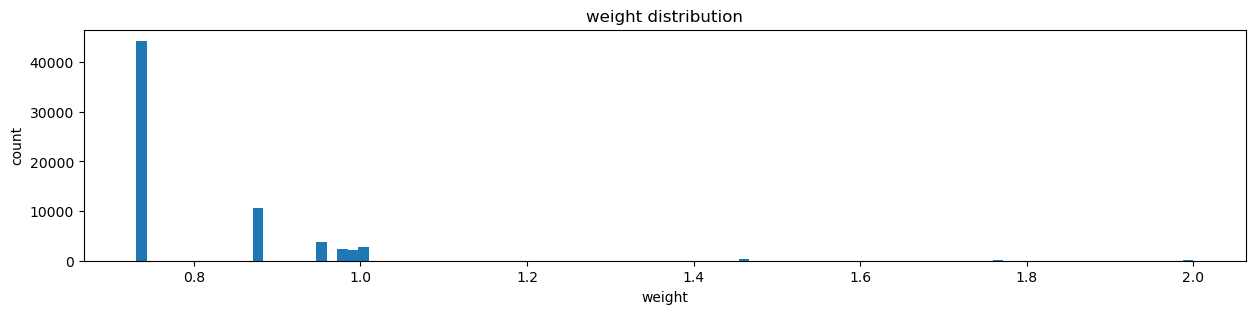

In [934]:
plot_weight_dist(before_weight_df)

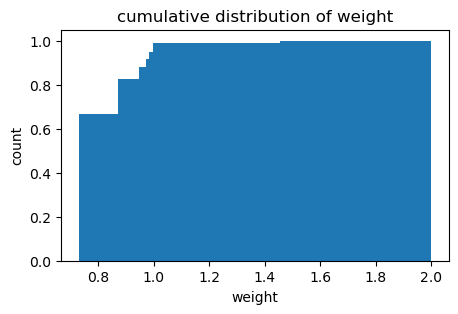

In [935]:
plot_weight_cumulative_dist(before_weight_df)

## weight -> community

#### build community

In [936]:
# before_community_lst_lou_1 = create_community(before_weight_df, "louvain", resolution = 1000)
before_community_lst_s_1 = create_community(before_weight_df, 'surprise')
# before_community_lst_lei_1 = create_community(before_weight_df, 'leiden')

Method: surprise
Number of unique wallets: 38953
Number of edges: 66588
Number of communities detected: 11264
-
Average community size: 3.4581853693181817
Max community size: 988
Min community size: 1



In [974]:
before_row_lst = range(5)
before_row_lst = [16]

before_community_lst_visualization_1 = before_community_lst_s_1

for row in before_row_lst:
    print("size of community:", len(before_community_lst_visualization_1[row]))
    print(before_community_lst_visualization_1[row])
    before_commu_visual_df_1 = before_weight_df.loc[
        before_weight_df["wallet_a"].isin(before_community_lst_visualization_1[row])
        & before_weight_df["wallet_b"].isin(before_community_lst_visualization_1[row])
    ]
    # before_commu_visual_df_1['if_wallet_a_in_edu'] = before_commu_visual_df_1['wallet_a'].isin(edu_airdrop_wallet)
    # before_commu_visual_df_1['if_wallet_b_in_edu'] = before_commu_visual_df_1['wallet_b'].isin(edu_airdrop_wallet)
    print("Average weight:", before_commu_visual_df_1["weight"].mean())

size of community: 229
['0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1', '0x9de6d53a0d99eecdd5e944ff298bea35322bae64', '0xc81b3246835c4d1ca377794fbe01021ca33d44a3', '0xc81431c387123292c2f39ab5d4b6661ba53044a3', '0xacb814c694133e6c1b24f937d8dfcaab6f011b25', '0x41e4ea03501cfdc61a4963bda36769b5192bae64', '0xbd5297c562bb87c4195f191653e7b271182952d8', '0x94264a3d50fe35ac858f6f568a2a0a2e534d44a3', '0xc81daf1f72ce51cdfb1ff9cf331bf9ecc0ed44a3', '0x99348d690de2e481cd1ef33f2db5c2cce9dd6c25', '0xdbe4998349547c35e7cffe0c0235463fe1f61da4', '0x9963ed7c298410517d38a52c9a4bff3fa40ec9a2', '0x74816c29abd655ad3f853907a35ee16c723046fb', '0x25287ba0ce86a854c6d318a8d75bacb0e4e2d035', '0xba689e9c67cb7366d92a4c65e99977baee59b4b7', '0xe41a7b9bc81b46302f9c1d285b626f1e6f78ed11', '0xe87c30f71800c63528be8a87f134ff0bb8888888', '0xacb7ceafb57ce9576694f3d784d0f5ba89a11b25', '0xc85f2001d28bf24df83338dd22b30fdfc97a44a3', '0x156dda3b91b9bcb0087e4a10e6dd238ab95bcc4a', '0x4478e52e24f7832d15d5e11e7c4315e5152952d8', '0xe000d1e

In [978]:
# community_visualization(before_commu_visual_df_1)

In [976]:
before_commu_visual_df_1

,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
131,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",47,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0x9de6d53a0d99eecdd5e944ff298bea35322bae64,True,False,0.0,1.000000
93,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",61,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0xc81b3246835c4d1ca377794fbe01021ca33d44a3,True,False,0.0,1.000000
86,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",69,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0xc81431c387123292c2f39ab5d4b6661ba53044a3,True,False,0.0,1.000000
258,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",30,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0xacb814c694133e6c1b24f937d8dfcaab6f011b25,True,False,0.0,1.000000
276,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",29,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0x41e4ea03501cfdc61a4963bda36769b5192bae64,True,False,0.0,1.000000
...,...,...,...,...,...,...,...,...
36875,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",1,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0xdbe4aa02ce594f12b9f7c15224c5b0734eed1da4,True,False,0.0,0.731059
36878,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",1,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0xbd52297f88772893b5117a18af3dfdf3eb4f52d8,True,False,0.0,0.731059
36880,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",1,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0x7481a4473feaa878939d570c07f4d1f5398546fb,True,False,0.0,0.731059
36882,"(0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1, 0...",1,0x1797bd5618ba6addf158fc9f5ab3b58de838a2b1,0x993434c45f2ac8c240a3f44878d0c982db7d6c25,True,False,0.0,0.731059


#### filter and expand the community list

# Compare & Validate

## Filter and expand the community list

In [940]:
def filter_community_lst(community_lst, wallet_lst=edu_airdrop_wallet):
    return [
        [item for item in sublist if item in wallet_lst]
        for sublist in community_lst
    ]

In [941]:
def expand_community_lst(community_lst, wallet_lst=edu_airdrop_wallet):
    # For wallets that are not in any community, add them as single element lists
    community_lst.extend(
        [
            [item]
            for item in wallet_lst
            if item not in [subitem for sublist in community_lst for subitem in sublist]
        ]
    )
    return community_lst

### For before

In [942]:
before_filtered_list_of_lists = before_community_lst_visualization_1.copy()
before_filtered_list_of_lists = filter_community_lst(before_filtered_list_of_lists)
before_filtered_list_of_lists = expand_community_lst(before_filtered_list_of_lists)

In [971]:
display(len(before_filtered_list_of_lists))
display([len(x) for x in before_filtered_list_of_lists][:10])

12143

[549, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### For After 

In [944]:
after_filtered_list_of_lists = community_lst_visualization_1.copy()
after_filtered_list_of_lists = filter_community_lst(after_filtered_list_of_lists)
after_filtered_list_of_lists = expand_community_lst(after_filtered_list_of_lists)

In [945]:
display(len(after_filtered_list_of_lists))
display([len(x) for x in after_filtered_list_of_lists][:10])

2324

[28, 28, 28, 28, 23, 20, 16, 9, 15, 11]

## Similarity between the two communities

In [946]:
# before_num = 0
# after_num = 0
# before_set = set(before_filtered_list_of_lists[before_num])
# after_set = set(after_filtered_list_of_lists[after_num])
# print("Before:", len(before_set))
# print("After:", len(after_set))

# common_elements = before_set.intersection(after_set)
# print("Common:", len(common_elements))
# similarity = len(common_elements) / min(len(before_set), len(after_set))
# print(similarity)

## Big-community wallets

In [967]:
before_big_commu_wallets = [
    wallet
    for community in before_filtered_list_of_lists
    if len(community) > 2
    for wallet in community
]

In [968]:
after_big_commu_wallets = [
    wallet
    for community in after_filtered_list_of_lists
    if len(community) > 2
    for wallet in community
]

In [969]:
print("Before:", len(before_big_commu_wallets))
print("After:", len(after_big_commu_wallets))
print("")

common_big_wallets = set(before_big_commu_wallets).intersection(
    set(after_big_commu_wallets)
)
print("Common:", len(common_big_wallets))
big_similarity = len(common_big_wallets) / min(
    len(before_big_commu_wallets), len(after_big_commu_wallets)
)
print("Common rate: ", big_similarity)
print("")

random_rate(
    len(before_big_commu_wallets), len(after_big_commu_wallets), edu_airdrop_wallet
)

Before: 1287
After: 712

Common: 420
Common rate:  0.5898876404494382



0.42640449438202244

In [950]:
print("before and after 1: ", len(common_big_wallets))
print("before 1 and after 0: ", len(before_big_commu_wallets) - len(common_big_wallets))
print("before 0 and after 1: ", len(after_big_commu_wallets) - len(common_big_wallets))
print("before 0 and after 0: ", len(edu_airdrop_wallet) - len(before_big_commu_wallets) - len(after_big_commu_wallets) + len(common_big_wallets))


before and after 1:  420
before 1 and after 0:  867
before 0 and after 1:  292
before 0 and after 0:  1436


### Investigate uncommon wallets

In [951]:
only_in_before = uncommon_wallets(before_big_commu_wallets, after_big_commu_wallets)
only_in_after = uncommon_wallets(after_big_commu_wallets, before_big_commu_wallets)

#### Explore only_in_before

In [952]:
print(len(only_in_before))

867


In [953]:
# find which community the only_before wallet belongs to after airdrop
only_before_in_after = {}
for i, wallet in enumerate(only_in_before):
    num_trans = find_transfer_for_wallet(wallet, weight_df, "or").shape[0]
    num_trans_before = find_transfer_for_wallet(wallet, before_weight_df, "or").shape[0]
    before_community = find_commu_for_wallet(wallet, before_filtered_list_of_lists)
    only_before_in_after[wallet] = [
        num_trans,
        num_trans_before,
        before_community,
        len(before_filtered_list_of_lists[before_community]),
        len([x for x in before_filtered_list_of_lists[before_community] if x in edu_airdrop_wallet]),
    ]
    # only_before_in_after[wallet] = (
    #     f"after {num_trans} tran | before {num_trans_before} trans | before in commu no. {before_community}"
    # )
    only_before_in_after = dict(
        sorted(only_before_in_after.items(), reverse=True, key=lambda item: item[1])
    )

In [973]:
only_before_in_after_df = pd.DataFrame(only_before_in_after).T
only_before_in_after_df.columns = [
    "after transaction",
    "before transaction",
    "before community number",
    "before community size",
    "before community airdrop wallet count",
]
display(only_before_in_after_df.sort_values(by="before transaction"))
display(only_before_in_after_df.value_counts(['before transaction']).sort_index())
display(only_before_in_after_df.value_counts(['after transaction']).sort_index())

,after transaction,before transaction,before community number,before community size,before community airdrop wallet count
0x2bb4630667613a1df0df1f01f32585b883102038,0,1,31,145,145
0x32cde1a4c5a1344bd555c90bd864b8248bf00aef,0,1,196,33,33
0x255a61b9c585f2ced567e2161eb0b764fcc3b81d,2,1,196,33,33
0xcc681fcac73a986fb05c08afc09ceac973a2fd63,0,1,196,33,33
0xf6b0ed4ce3ccf7f65655d61766fb385c787288a1,0,1,222,4,4
...,...,...,...,...,...
0xb67e49a45858f3cbf2bc2026a4347b5518279798,1,179,45,3,3
0x79bdda65c706cbda69c0ad4c8da1d3e91724f48d,0,186,0,549,549
0xf888321e980dcf01dea475029afcbf8af51fbde3,0,187,0,549,549
0x364d6a48415d45a1c12dab4ab2a00c7d1bcc95d7,0,214,18,19,19


before transaction
1                     57
2                     31
3                     37
4                     37
5                     59
                      ..
179                    1
186                    1
187                    1
214                    1
336                    1
Length: 113, dtype: int64

after transaction
0                    493
1                    341
2                     20
3                      8
5                      1
6                      1
8                      1
11                     1
13                     1
dtype: int64

In [955]:
for i in range(1):
    current_only_before_in_after = list(only_before_in_after.items())[i]
    print(current_only_before_in_after)
    current_wallet = list(only_before_in_after.keys())[i]
    wallet_after_activity = find_transfer_for_wallet(current_wallet, weight_df, "or")
    if wallet_after_activity[['if_wallet_a_in_edu', 'if_wallet_b_in_edu']].eq(False).any(axis=1).all():
        print('outside_transfer')
    else:
        display(wallet_after_activity)
    
    print("")


('0xdf89f16e91b30974d5e78344b780faa71d8c777e', [13, 2, 287, 12, 12])
outside_transfer



#### Explore only_in_after

In [956]:
print(len(only_in_after))

292


In [957]:
# find which community the only_before wallet belongs to after airdrop
only_after_in_before = {}
for i, wallet in enumerate(only_in_after):
    num_trans = find_transfer_for_wallet(wallet, before_weight_df, "or").shape[0]
    num_trans_after = find_transfer_for_wallet(wallet, weight_df, "or").shape[0]
    after_community = find_commu_for_wallet(wallet, filtered_list_of_lists)
    only_after_in_before[wallet] = f"before {num_trans} tran - after {num_trans_after} trans - after in commu no. {after_community}"
    only_after_in_before = dict(
        sorted(only_after_in_before.items(), reverse=True, key=lambda item: item[1])
    )

In [958]:
only_after_in_before

{'0x0ecf5262e5b864e1612875f8fc18f151315b5e91': 'before 99 tran - after 4 trans - after in commu no. 16',
 '0xa5f9419373f0a88e3a92bf5b944a84a19db555ba': 'before 98 tran - after 2 trans - after in commu no. 722',
 '0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c': 'before 97 tran - after 2 trans - after in commu no. 38',
 '0x01291849cc904161603c1c60ff86658ad7eadb8d': 'before 92 tran - after 3 trans - after in commu no. 42',
 '0x2fe2e22923c5fd3e28143425f23ead539714c023': 'before 92 tran - after 1 trans - after in commu no. 38',
 '0x72de1fc13ce2ae2f12a7b802a4a963b7641d25ac': 'before 9 tran - after 1 trans - after in commu no. 9',
 '0xd90fe216865374a701bcda37198232253d76cfe5': 'before 9 tran - after 1 trans - after in commu no. 85',
 '0x8a44e65288dc50c6bf8931e1e8216b5fb77f01eb': 'before 7 tran - after 1 trans - after in commu no. 16',
 '0x69ffa57ffc5f4caa11cdfa3e2fb625be77ce9b61': 'before 7 tran - after 1 trans - after in commu no. 101',
 '0x1bd5371940f7d032381a2da7f7e651f4e398fdb2': 'before 69 

In [959]:
for i in range(3):
    current_only_after_in_before = list(only_after_in_before.items())[i]
    print(current_only_after_in_before)
    current_wallet = list(only_after_in_before.keys())[i]
    wallet_before_activity = find_transfer_for_wallet(current_wallet, before_weight_df, "or")
    if wallet_before_activity.shape[0] == 0:
        print('no transfer')
    elif (wallet_before_activity['wallet_a'] == wallet_before_activity['wallet_b']).all():
        print('self transfer for all rows')
    else:
        display(wallet_before_activity)
    print("")

('0x0ecf5262e5b864e1612875f8fc18f151315b5e91', 'before 99 tran - after 4 trans - after in commu no. 16')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
2616,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",7,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0x81b13614e2adbfac899e24099c2f102f4ea64788,True,False,0.0,0.999089
2636,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",7,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xbda5c53e7537031a0b078e829fd7c4ccf6b0e2b1,True,False,0.0,0.999089
3620,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",6,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xbbb45ea97d08762bed958ee4c53c0a56d06e51d2,True,False,0.0,0.997527
3125,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",6,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xe09828f0da805523878be66ea2a70240d312001e,True,False,0.0,0.997527
3080,"(0x003cd6d401f7136c409c885c6e61a21a2fb95150, 0...",6,0x003cd6d401f7136c409c885c6e61a21a2fb95150,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,False,True,0.0,0.997527
...,...,...,...,...,...,...,...,...
38628,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",1,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xad7e515409e5a7d516411a85acc88c5e993f570a,True,False,0.0,0.731059
38590,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",1,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xa19c85572f0bf8d32145244d1886e59025ad0d60,True,False,0.0,0.731059
38232,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",1,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0xa5025faba6e70b84f74e9b1113e5f7f4e7f4859f,True,False,0.0,0.731059
36507,"(0x0ecf5262e5b864e1612875f8fc18f151315b5e91, 0...",1,0x0ecf5262e5b864e1612875f8fc18f151315b5e91,0x853784b7bde87d858555715c0123374242db7943,True,False,0.0,0.731059



('0xa5f9419373f0a88e3a92bf5b944a84a19db555ba', 'before 98 tran - after 2 trans - after in commu no. 722')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
44,"(0x000000000000000000000000000000000000dead, 0...",121,0x000000000000000000000000000000000000dead,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,False,True,0.0,1.000000
261,"(0xa5f9419373f0a88e3a92bf5b944a84a19db555ba, 0...",30,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,0xe18ed8ddef5eb821497de114ddca029af434d86d,True,False,0.0,1.000000
3057,"(0xa5f9419373f0a88e3a92bf5b944a84a19db555ba, 0...",6,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,0xdc05c4da79cb1f85e678b4626052c0214ec592fb,True,False,0.0,0.997527
6763,"(0xa5f9419373f0a88e3a92bf5b944a84a19db555ba, 0...",4,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,0xa8f031b115ee05bbf2a2b8f088460edbf04ebe7b,True,False,0.0,0.982014
7420,"(0x9ee944c13a7f4aa9d69237e9dfc01e58cff37cb5, 0...",4,0x9ee944c13a7f4aa9d69237e9dfc01e58cff37cb5,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,False,True,0.0,0.982014
...,...,...,...,...,...,...,...,...
43281,"(0xa5f9419373f0a88e3a92bf5b944a84a19db555ba, 0...",1,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,0xbb2b2e658961caaaa2c1658d7243156d28204c2e,True,False,0.0,0.731059
42676,"(0xa5f9419373f0a88e3a92bf5b944a84a19db555ba, 0...",1,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,0xd7fa3480832d11794794ebe95724a965aa4d1611,True,False,0.0,0.731059
42651,"(0x78894748c02d5a39ca8f229298f65511c8c7df57, 0...",1,0x78894748c02d5a39ca8f229298f65511c8c7df57,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,False,True,0.0,0.731059
37640,"(0x1b53d89a85b7ca357a4e910dd1cce97137518966, 0...",1,0x1b53d89a85b7ca357a4e910dd1cce97137518966,0xa5f9419373f0a88e3a92bf5b944a84a19db555ba,False,True,0.0,0.731059



('0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c', 'before 97 tran - after 2 trans - after in commu no. 38')


,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
441,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",22,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0x8b06c2f2c47885e5642bf4fac71886de766b4cb3,True,False,0.0,1.000000
631,"(0x09bb16c94a3ba650b7b825bff641626bbe179e6d, 0...",18,0x09bb16c94a3ba650b7b825bff641626bbe179e6d,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,False,True,0.0,1.000000
764,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",17,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0xe09828f0da805523878be66ea2a70240d312001e,True,False,0.0,1.000000
1700,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",10,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0x9e9b768174ef24233bf8ac2f4131f10ff5e72dee,True,False,0.0,0.999955
1845,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",9,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0xbc3b48c8ebbd0a33ae951a5f41b1e03d33f90419,True,False,0.0,0.999877
...,...,...,...,...,...,...,...,...
38554,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",1,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0x964a05a514129a1b4bb9c8ad6d18ffeb5c75eb46,True,False,0.0,0.731059
38208,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",1,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0xa5025faba6e70b84f74e9b1113e5f7f4e7f4859f,True,False,0.0,0.731059
36069,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",1,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0xf74568bd1c046ae8bf6e154787c614d9eaf50d5b,True,False,0.0,0.731059
37232,"(0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c, 0...",1,0x3f9a5a0267ce4ff6d84c08fd5150acb593e4523c,0x7dc640dc1032a4d63802e824d14e7c599795f22d,True,False,0.0,0.731059


In [960]:
find_transfer_for_wallet("0x13ec276ed75cf4376217558d7a8669f1b08e13b8", before_weight_df, "or")

,pair,before_bsc_transfer_count,wallet_a,wallet_b,if_wallet_a_in_edu,if_wallet_b_in_edu,internal_weight,weight
2203,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",8,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xe09828f0da805523878be66ea2a70240d312001e,True,False,0.0,0.999665
6422,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",4,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xf6fd8e97a6d54b2d85023daa5440c4bfa66eb424,True,False,0.0,0.982014
20771,"(0x044332f4b34fd5639482de41cd1d767f7304fa00, 0...",2,0x044332f4b34fd5639482de41cd1d767f7304fa00,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,False,True,0.0,0.880797
63569,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x7dbfdc0a2d18f690d35f38e66dfab795c0175dac,True,False,0.0,0.731059
61441,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x410bbbf625629c9e70c29c7066f71a641117eb8c,True,False,0.0,0.731059
55602,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xe2fc31f816a9b94326492132018c3aecc4a93ae1,True,False,0.0,0.731059
24820,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0xc6e67020672d49f165fe66d11e6457a28c013e90,True,False,0.0,0.731059
25079,"(0x13ec276ed75cf4376217558d7a8669f1b08e13b8, 0...",1,0x13ec276ed75cf4376217558d7a8669f1b08e13b8,0x781ce7d4aa8740957c9bc869e3e331fa85d9217b,True,False,0.0,0.731059


### Confusion matrix

In [961]:
# true_positive: in Before (test) and After (fact)
true_positive = len(common_big_wallets)
# false_positive: in Before, not in After
false_positive = len(before_big_commu_wallets) - true_positive
# false_negative: in After, not in Before
false_negative = len(after_big_commu_wallets) - true_positive
# true_negative: not in Before, not in After, but in the airdrop list
true_negative = len(edu_airdrop_wallet) - len(before_big_commu_wallets) - false_negative

In [962]:
# precision, recall, f1_score
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)
accuracy = (true_positive + true_negative) / len(edu_airdrop_wallet)

In [963]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

Precision: 0.32634032634032634
Recall: 0.5898876404494382
F1 Score: 0.42021010505252626
Accuracy: 0.6155887230514097


# End of file